# Реализация модернизированной FCN сети
Реализация FCN модели с использованием изученных слоёв, которая потенциально должна выдвать более высокое качество на реальных задачах по семантической сегментации.

# Новый раздел

### Загрузка необходимых библиотек


In [ ]:
import numpy as np

import tensorflow as tf
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.6.0


### Создание FCN модели
Для создания модели создадим собственный класс, наследованный от `tf.keras.Model`.
Ранее мы использовали лишь свёртки и пулинги для извлечения признаков и понижения пространственных размерностий. Это был наш Энкодер. В качестве Декодера у нас был простой Upscale слой, который просто расширял изображение до нужного размера. Теперь же давайте реализуем более качественный Декодер с использованием слоёв для повышения разрешения.

В примере ниже будем использовать Unpooling (в керасе это делает слой `tf.keras.layers.UpSampling2D`) перемежающиийся со свёрточными слоями.

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')        
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pool(out)        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.pool(out)        
        out = self.conv5(out)
        out = self.conv6(out)
        
        # Decoder        
        out = self.unpool(out)        
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.unpool(out)        
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.conv11(out)

        return out
    
model = Model()

### Задания


Создайте новую модель, аналогичную описанной выше, в котрой замените все Pooling слои на свёрточные слои со страйдом 2

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')        
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')    
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')        
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pool1 = tf.keras.layers.Conv2D(64, (3, 3), strides = (2, 2), padding='same', activation='relu')
        self.pool2 = tf.keras.layers.Conv2D(128, (3, 3), strides = (2, 2), padding='same', activation='relu')
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
                
    def call(self, x):
      
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pool1(out)        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.pool2(out)        
        out = self.conv5(out)
        out = self.conv6(out)
        
        # Decoder        
        out = self.unpool(out)        
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.unpool(out)        
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.conv11(out)

        return out
    
model = Model()


**[ЗАДАНИЕ 3]** Реализуйте одну из написанных моделей (исходную или из Задания 2) с помощью функционального API кераса. Входом в модель сделайте узел `tf.keras.layers.Input((256, 256, 3))`. После этого визуализализируйте полученную модель с помощью `tf.keras.utils.plot_model(model, show_shapes=True)`. Проверьте размерности выходов всех слоёв

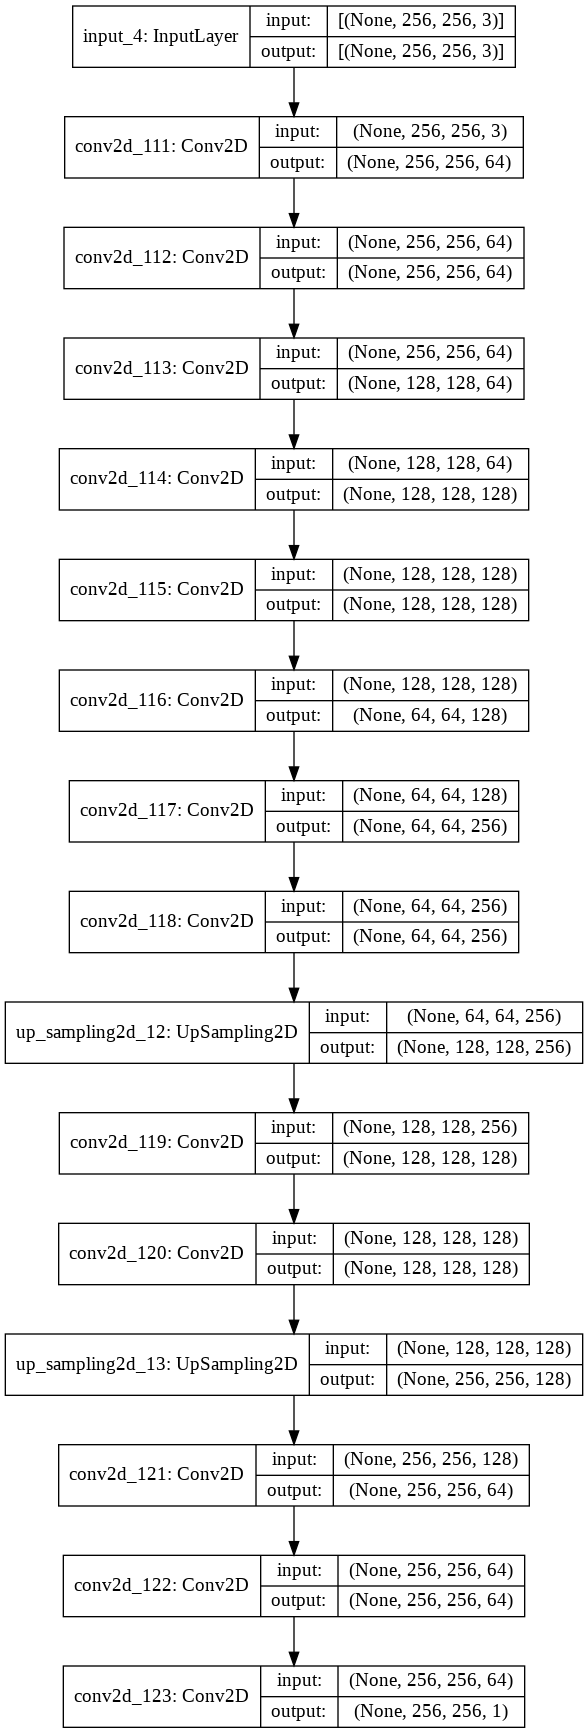

In [ ]:

x = tf.keras.layers.Input((256, 256, 3))
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(64, (3, 3), strides = (2, 2), padding='same', activation='relu')(out)        
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(128, (3, 3), strides = (2, 2), padding='same', activation='relu')(out)        
out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
        
# Decoder        
out = tf.keras.layers.UpSampling2D((2, 2))(out)        
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.UpSampling2D((2, 2))(out)        
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(out)

model1 = tf.keras.Model(inputs=x, outputs=out)
tf.keras.utils.plot_model(model1, show_shapes=True)


**[ЗАДАНИЕ 4]** Реализуйте пайплайн обучения для такой модели (одной из): подготовка данных, лосс, обучение, тестирование. Используйте материалы из предыдущего практического урока. Обучите модель и сравните время обучения с временем обучения простой FCN из предыдущего урока.

In [16]:
import random
import imageio
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.6.0


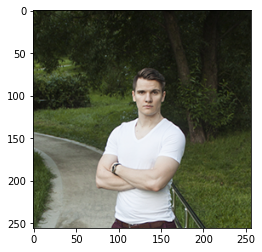

In [17]:
img = imageio.imread('sample_data/me_256.png')
img = img.astype(np.float32) / 255.
_=plt.imshow(img)

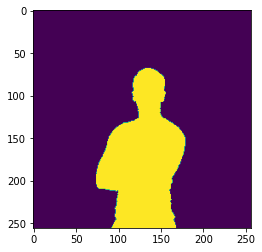

In [20]:
gt = imageio.imread('sample_data/me_gt_256.png')
gt = gt.astype(np.float32) / 255.
gt = np.mean(gt, axis=2)[...,None]
_=plt.imshow(gt[...,0])

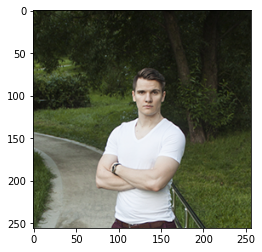

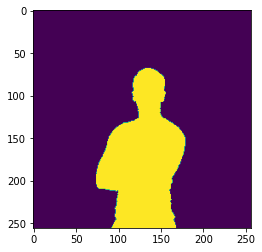

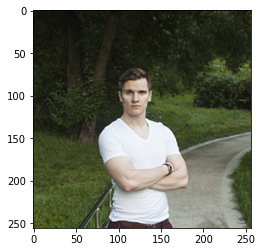

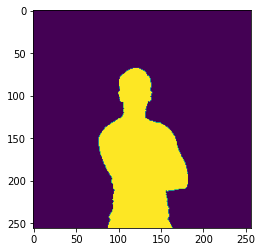

(<matplotlib.image.AxesImage at 0x7f8eab7d4110>, None)

In [21]:
train_x = np.stack((img, img[:,::-1,:]))
train_y = np.stack((gt, gt[:,::-1,:]))

plt.imshow(train_x[0]), plt.show()
plt.imshow(train_y[0][...,0]), plt.show()
plt.imshow(train_x[1]), plt.show()
plt.imshow(train_y[1][...,0]), plt.show()

In [22]:
NUM_EPOCHS = 100

loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss)
history = model.fit(train_x, train_y, batch_size=1, epochs=NUM_EPOCHS)

Epoch 1/100
2/2 [==============================] - 9s 4s/step - loss: 0.6897
Epoch 2/100
2/2 [==============================] - 7s 4s/step - loss: 0.6873
Epoch 3/100
2/2 [==============================] - 7s 4s/step - loss: 0.6671
Epoch 4/100
2/2 [==============================] - 7s 4s/step - loss: 0.6110
Epoch 5/100
2/2 [==============================] - 7s 4s/step - loss: 0.3790
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 0.2860
Epoch 7/100
2/2 [==============================] - 7s 4s/step - loss: 0.2761
Epoch 8/100
2/2 [==============================] - 7s 4s/step - loss: 0.2572
Epoch 9/100
2/2 [==============================] - 7s 4s/step - loss: 0.2440
Epoch 10/100
2/2 [==============================] - 7s 4s/step - loss: 0.2399
Epoch 11/100
2/2 [==============================] - 7s 4s/step - loss: 0.2310
Epoch 12/100
2/2 [==============================] - 7s 4s/step - loss: 0.2294
Epoch 13/100
2/2 [==============================] - 7s 4s/step - loss: 0.

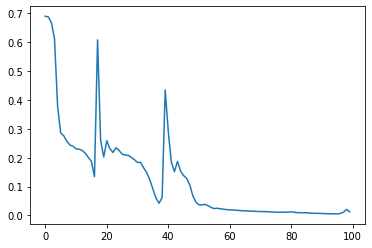

In [23]:
plt.plot(history.history['loss'])

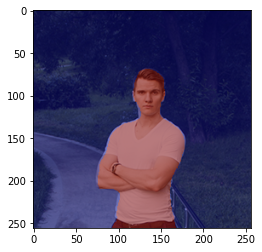

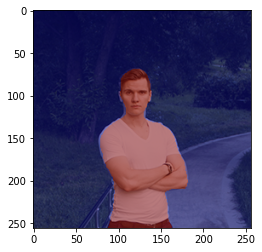

In [24]:
for sample in train_x:
    out = model.predict(sample[None, ...])
    seg_map = (out[0, ..., 0]>0.5).astype(np.float32)
    seg_map_clr = plt.get_cmap('jet')(seg_map)[..., :3]
    plt.imshow(sample*0.5 + seg_map_clr*0.5)
    plt.show()